In [0]:
!pip install -q tensorflow-gpu==2.0.0-alpha0

In [0]:
import numpy as np
import copy

sentence = """
정부가 1년여를 끌어 온 주류 세제 개편안을 통과시키며 소비자들의 관심이 '맥주 가격'으로 옮겨가고 있다. 주세가 낮아지는 캔맥주의 경우 큰 문제가 없지만 병맥주와 생맥주 등 주세가 오히려 높아지는 제품의 경우 가격 인상이 이뤄지는 것 아니냐는 우려다.
6일 업계에 따르면 기획재정부는 맥주와 탁주에 대해 주세 체계를 기존 종가세에서 종량제로 변경한다. 
맥주의 경우 기존 종가세 체제 하에서는 원가의 72%를 세금으로 부과했지만 내년부터는 일괄적으로 1ℓ당 830.3원의 주세가 적용된다. 이에 따르면 캔맥주의 주세(부가가치세 포함)는 기존 종가세 체제 때보다 ℓ당 415원 감소, 수입맥주와의 가격 차이를 줄일 수 있게 됐다. 
다만 생맥주와 페트병 맥주, 병맥주는 오히려 세금이 늘어난다. 특히 생맥주의 경우 ℓ당 445원이 늘어 가격 인상 우려가 있다는 지적이다. 
정부는 세제 변경으로 인한 가격 인상을 막기 위해 생맥주에 한해 2년간 주세를 20% 감면하기로 했다. 결과적으로 생맥주의 경우 세금이 25.4% 증가한다.
김병규 기획재정부 세제실장은 전날 주류세 개편안 발표에서 "국산 캔맥주에서는 세 부담이 크게 줄어 기업 내부에서 부담이 상쇄될 것으로 본다"며 "생맥주 가격은 오르지 않을 것으로 판단한다"고 밝혔다. 
하지만 각 업체의 점유율이 상이한 상황에서 다른 제품의 부담이 줄었으니 인상 요인이 있는 제품도 가격이 오르지 않을 것이란 정부의 주장은 지나치게 안일한 인식이 아니냐는 지적이 나온다. 세금이 줄어드는 캔맥주의 경우 가격이 내려가고 세 부담이 늘어나는 생맥주와 병맥주의 경우 가격 인상이 이뤄질 수도 있다는 것이다.
정부의 세금 감면이 진행되는 2년간은 가격이 오르지 않을 수 있지만 이후에는 결국 세 부담을 이유로 가격 인상에 나설 것이란 전망이 나오는 이유다. 
실제 세 부담이 많이 감소하는 캔맥주의 경우 '4캔 1만원' 마케팅을 펼치고 있는 수입 캔맥주와의 경쟁을 위해 가격 인하에 나설 가능성이 제기된다. 맥주업계는 그동안 "국산 맥주에 불공평한 주세법 때문에 가격 경쟁을 하고 싶어도 할 수가 없는 상황"이라며 볼멘소리를 해 왔다. 종량세 개편이 현실이 된 만큼 캔맥주 가격이 인하될 가능성이 높아진 것이다. 
한 주류업계 관계자는 "주세 인하로 출고가가 내려가면 수입맥주와의 경쟁을 위해 가격이 낮아질 가능성도 있다"며 "시행까지는 시간이 있기 때문에 다양한 방안을 검토하고 있다"고 말했다. eos 

정부가 지난 5일 맥주와 막걸리(탁주)에 한해 종량세를 우선 도입한다고 발표하면서 50년 묵은 주세법이 변화를 맞게 됐다. 일각에서는 맥주와 소주업계 모두 원하는 결과를 얻으면서 당분간 가격 인상 명분을 내세우기 어렵게 됐다는 반응이 나온다.
주류 과세체계가 술의 종류와 관계없이 가격 기준으로 세금을 매기는 종가세에서 술의 양과 알코올 도수를 기준으로 세금을 매기는 종량세로 전환되면서 국산 맥주와 수입 맥주 간 세금 차별 시비가 상당 부분 해소될 것으로 보인다.
7일 맥주 업계는 대체적으로 환영한다는 입장이다. 한 맥주 업체 관계자는 "기울어진 운동장을 바로잡는다는 정부 취지에 공감한다"며 "국산 맥주의 경쟁력이 회복되는 계기가 될 것"이라고 기대감을 드러냈다.
오비맥주 관계자는 "종가세 체계에서는 국내에서 맥주를 생산하면 할수록 세금을 더 내야 해 차라리 수입하는 게 이익이 나는 구조였다"며 "종량세 도입으로 해외에 나갔던 생산 물량이 한국으로 돌아올 가능성이 커져 내수 활성화는 물론 고용 창출 효과도 기대된다"고 설명했다.
실제로 그동안 오비맥주는 주세 경감을 위해 전량 광주공장에서 생산하던 버드와이저와 호가든, 카스 740㎖ 등을 해외에서 생산해 역수입했다.
소주업계는 이번 종량세 개편에서 제외되면서 내심 안도하는 모양새다. 소주의 경우 종량세를 도입할 경우 세금이 대폭 올라가 소비자 가격 인상이 불 보듯 뻔해 소비자 반발이 예상됐었다. 지난 3일 서울 양재동 aT센터에서 열린 '주류과세 체계의 개편에 관한 공청회'에서도 소주업계는 이러한 점을 강조하면서 종가세 방어에 앞장섰다.
이날 공청회에서 이종수 무학 사장은 "맥주에만 논의되던 종량세 전환이 전 주종으로 확대되면 50년간 지속되던 산업 구조가 한꺼번에 바뀔 수 있다"며 "소주에 대한 종량세 개편은 이에 대한 파급력이 조금 더 연구된 상태에서 진행돼야 한다"고 소주 업계의 입장을 대변했다.
하지만 종량세, 종가세 등 전문 용어를 앞세운 정보들만 넘쳐나다 보니 정작 주류를 소비하는 소비자들이 혜택을 보는 것인지, 부담이 늘어나는 것인지 헷갈린다는 지적이다.
인천 서구에서 자영업을 하고 있다는 전 모(46)씨는 "언론에서 종량세, 종가세 이야기를 하고 있지만 잘 이해가 안 된다"며 "중요한 건 업체들만 좋은 것이 아니라 우리 같은 서민들에게 직접적인 혜택이 있어야 하는 것"이라고 목소리를 높였다.
주요 주류의 가격 변화에 대해서는 일부 가격 조정이 예상된다는 이야기가 나오지만 업계 반응은 신중하게 접근하겠다는 것이 중론이다.
먼저 종량세 도입으로 캔맥주는 도매가격에서 1ℓ에 부과되는 주세가 830원이 된다. 여기에 교육세, 부가가치세 등을 포함한 총 세부담은 현행 1758원에서 23.6% 줄어든 1342원이 된다. ℓ당 415원 가량 가격 인하 요인이 생기는 셈이다. 
이에 반해 생맥주는 세금이 현재 ℓ당 815원에서 1260원으로 소폭 오른다. 이를 고려해 기재부는 생맥주에 한해 2년간 한시적으로 주세 20%를 감세한다는 방침이지만, 시중에서 판매되는 생맥주는 500㎖ 한잔 당 가격이 현재보다 100원 정도 오를 것으로 전망된다.
한 업계 관계자는 "국산 맥주는 지금보다 인하될 가능성은 있다"면서도 "일부 제품들 가격이 이미 인상됐기 때문에 어느 정도 인하가 된다고 해도 인상 전보다는 가격이 높을 수 있고, 출고가가 인하되면 가정용 소비자가는 당연히 인하되겠지만 유흥 채널의 맥주 가격은 떨어지기 어려울 것"이라고 내다봤다. 
가장 관심이 주목됐던 '수입맥주 4캔에 1만원' 마케팅도 계속 유지될 것으로 보인다. 이번 주세 개편을 주도한 조세재정연구원은 공청회에서 "일부 저가 수입맥주는 세금이 높아지지만 반대로 고가 수입 맥주의 세 부담은 줄어들 가능성이 높다"고 근거를 댔다.
종량세 도입을 적극 주장했던 수제맥주 업계도 환영의 뜻을 밝혔다. 투자, 연구 개발 여력이 생겨 다양한 고품질의 수제맥주를 출시할 수 있을 것이라는 전망이 나온다. 기존 종가세에서는 설비투자나 고급 재료 비용이 모두 세금에 연동돼 고품질 맥주를 개발하기 어려운 구조였지만 종량세로 전환되면 이러한 점에서 자유로워질 수 있기 때문이다.
수제맥주 업체 관계자는 "품질 향상과 제품개발에 주력할 수 있을 뿐만 아니라 가격을 올려야 유지가 가능하다는 부담에서도 벗어날 수 있어 수제 맥주시장이 활성화될 것"이라고 기대감을 드러냈다. eos 

맥주에 붙는 세금이 기존 종가세에서 종량제로 전환되면서 국산과 수입 맥주 간의 주세 형평성이 개선될 전망이다.
종량제가 도입되면 일부 수입 맥주가 국내에서 생산되며 국내 투자가 활성화될 것이란 장밋빛 관측이 나온다.
반면에 당장 주세법 개정안이 국회 문턱을 넘어야 하는 문제가 남아있고, 실제 세금이 개편된다 해도 가격 변동으로 이어지기는 어려울 것이란 분석도 제기된다.
더불어민주당과 기획재정부는 5일 당정협의를 통해 맥주와 탁주(막걸리)에 대한 세금을 종량제로 전환하기로 했다.
현재 국산 맥주는 출고가격에 주세 72%를 부과하는 '종가제' 체제다. 일반적으로 출고가격은 제조원가와 판매관리비, 이윤 등이 모두 포함된다.
오비맥주와 하이트진로, 롯데주류 등 국내 맥주업계 3사 기준으로 리터당 △병맥주 814원 △캔맥주 1121원 △패트맥주 803원 △생맥주 519원 등의 세금이 부과됐다.
수입 맥주도 종가제이지만 수입신고 가격에 주세가 부과됐다. 
즉, 수입가격을 낮게 신고한 뒤 72%의 세금을 내고 난 뒤, 판매관리비와 이윤 등을 붙이면 국산 맥주보다 가격 경쟁력에서 우위를 확보할 수 있었다. '4캔에 1만원'으로 판매할 수 있는 배경이다.
실제로 국산 맥주의 리터당 평균 주세는 2015년 807원에서 지난해(잠정치) 848원으로 증가 추세를 보인 반면, 수입 맥주는 2015년 840원에서 지난해 709원으로 낮아졌다.
그동안 수입 맥주는 이 같은 가격 경쟁력을 앞세워 국내 맥주 시장의 점유율을 꾸준히 높여왔다.
국산 맥주는 2015년 91.5%의 점유율을 보였으나 지난해(지난해) 79.8%를 기록하며 80%대가 무너졌고, 수입 맥주 점유율은 2015년 8.5%였으나 지난해 20.2%로 크게 성장했다.
따라서 국산 맥주 업계가 '기울어진 운동장'이라며 주세 개편을 꾸준히 주장해 온 만큼, 이번 종량제 전환은 숙원사업이 해결된 것으로 해석된다.
맥주업계는 세금 형평성이 맞춰진 만큼, 해외 브랜드 맥주를 수입해 왔던 기존 산업구조가 국내 생산으로 바뀔 것으로 기대하고 있다. 국내 생산시설에 대한 투자로 고용 증가와 내수 확대 효과가 나타날 수 있다는 것이다.
한 국내 맥주업계 관계자는 "국내 맥주가 세금 때문에 차별받는 일을 없어진 것"이라며 "국내 생산시설이 수입 맥주의 생산기지로 활용되며 투자가 확대되고 고용이 늘어날 가능성이 있다"고 말했다.
하지만 국산과 수입 맥주 모두 리터당 830원의 주세가 부과되는 '종량제' 도입으로 당장 맥주 가격에 변동이 생기긴 어렵다는 전망이 나온다.
종량제가 도입돼도 국산 캔맥주만 291원의 절세 효과를 보기 때문이다. 오히려 국산 병맥주는 16원, 패트맥주는 27원, 생맥주는 311원의 주세가 늘어나게 된다.
또 수입 맥주는 주세가 인상되더라도 시장 점유율 포기할 수 없는 까닭에 가격을 인상하긴 어려울 것으로 보인다.
한 유통업계 관계자는 "주세가 개편되면 가격 변동 요인이 생기지만 맥주업체의 수익성과 시장 점유율을 모두 고려하면 국산 맥주든 수입 맥주든 한동안 서로 눈치보기 작전을 펼칠 것 같다"고 설명했다.
한편 주세 개편안이 마련된다 해도 '국회'라는 변수도 남아있다.
정부는 맥주와 막걸리에 대한 종량제 도입을 골자로 한 주세법 개정안을 9월 초 국회에 제출할 예정이다. 
하지만 정부안이 국회 논의 과정에서 손질될 가능성이 있고, 현재 연일 정쟁만 벌이는 국회가 파행돼 빨라야 내년쯤 주세 개편안이 시행될 수 있을 전망이다. eos 

내년부터 맥주 세제가 종가세에서 종량세로 바뀐다. 1ℓ당 830.3원의 주세가 붙는 방식으로 캔맥주는 기존보다 세금이 낮아지는 반면 병맥주, 생맥주는 세금이 오른다. 정부는 '캔맥주 세부담 감소와 병맥주, 생맥주 세부담 증가가 업체 내에서 상쇄가 가능해 소비자 가격 변동은 없을 것'이라고 강조했지만 경쟁이 치열하고 도매상을 통해 유통되는 맥주 시장 구조상 가격이 요동칠 가능성이 없지 않다.
기획재정부는 5일 발표한 주류 과세 체계 개편안에 따르면 맥주, 막걸리 주세 체계가 종가세에서 종량세로 전환된다. 기존 원가의 72%씩 가격을 매겼던 종가세에서 맥주는 1ℓ당 830.3원, 막걸리는 1ℓ당 41.7원씩 붙는 종량세로 바뀐다. 
제조원가가 달라 세금이 차이가 났던 병맥주, 캔맥주, 페트맥주 등이 일괄적으로 1ℓ당 830.3원의 주세가 적용되는 것. 이에 따라 병맥주의 주세는 814원에서 16원 오르고 캔맥주는 1121원에서 291원이 줄어든다. 페트는 27원 오른다. 단 1ℓ당 311원 가량 세부담이 늘어나는 생맥주의 경우 한시적으로 세율을 경감해 664.2원으로 적용키로 했다. 
국산맥주 평균적으로는 848원에서 830원으로 1ℓ당 18원 세금이 낮아지는 셈이다. 반면 평균적으로 1ℓ당 709원의 주세를 냈던 수입맥주의 세부담은 121원 늘어난다. 
정부는 "맥주업체가 모든 종류의 맥주를 취급하는 만큼 늘어나는 부담과 줄어드는 부분이 상쇄돼 소비자가격 변동은 없을 것"이라고 강조했다. 맥주업계 1위인 오비맥주는 "내부적으로 출고가 변경 등 세부 방안이 확정된 것은 아니지만 기존 가격을 최대한 그대로 유지한다는 방향은 정했다"고 말했다.
그러나 경쟁이 치열하고 도매상을 통해 판매되는 맥주 유통 구조상 가격이 영향을 받을 가능성도 적지 않다. 현재 주류 유통은 제조업체가 제조원가에 주세, 교육세, 부가가치세 등 세금을 더한 '출고가'를 기준으로 도매상에 제품을 공급하고 도매상이 소매점이나 식당 등으로 판매하는 구조다. 예를 들어 오비맥주의 카스 500ml 병맥주는 1203.22원, 하이트진로의 하이트, 테라는 1147원. 롯데주류의 클라우드는 1383원으로 용기별로 출고가가 고정돼 있다. 출고가에 포함된 세금이 바뀌면 출고가가 바뀔 가능성도 있는 셈. 
업계는 시행 시기가 남아있기 때문에 제도에 따른 대응 및 후속작업은 아직 결정된 바 없다는 입장이다. 업계 관계자는 "아직 시행까지는 6개월 이상 남아있어 종량세 전환에 따른 변화를 준비해야 할 것"이라고 말했다. 
종량세 도입을 적극적으로 주장해 온 수제맥주 업계는 환영의 뜻을 밝혔다. 아울러 투자, 연구 개발 여력이 생겨 다양한 고품질의 수제맥주를 출시할 수 있을 것이라고 밝혔다. 
수제맥주업계는 수입맥주와 국산맥주의 과세표준 차이로 수입맥주가 맥주시장점유율을 크게 높이며 수제맥주 사업 기반이 위협당해왔다고 주장해왔다. 실제 종가세 체계에서 국산맥주는 제조원가에 이윤, 판매관리비가 포함된 가격을 기준으로 세금을 매겼지만 수입맥주는 관세가 포함된 신고가격에 주세를 붙인 후 국내 판매 이윤, 판관비 등이 더해지는 방식이다. 
이에 따라 지난해 기준으로 국산맥주 주세 부담액은 1ℓ당 848원인 반면 수입맥주는 1ℓ당 709원으로 139원 차이가 났다. 
수제맥주 업계는 종량세 전환으로 진정한 맥주 품질 경쟁이 가능해졌다며 국내 맥주 시장 전체가 함께 성장하는 발판이 될 것이라 기대하고 있다. 기존 종가세 산하에서는 설비투자나 고급 재료 비용이 모두 세금에 연동돼 고품질 맥주를 개발하기 어려운 구조였으나 종량세로 전환되면 이러한 점에서 자유로워 질 수 있기 때문이다. 
수제맥주업계 관계자는 "제주맥주 등은 주세법 개편을 앞두고 양조장을 증설하는 등 투자를 단행했다"며 "종량세 도입이 확정된 만큼 시설 투자, 연구개발 확충 등의 효과가 기대된다"고 말했다. eos 
"""

In [0]:
import tensorflow as tf
# HyperParameter ====================================
num_of_attributes = 1
window_size = 8
batch_size = 64
epochs = 300
# ===================================================

# 1. Preprocessing ==================================

vocab_list = sentence.split(" ")

unique_word = set() # word set 추출
for stem in vocab_list:
    unique_word.add(stem)
    
word2idx = {}

for idx, item in enumerate(unique_word):
    word2idx[item] = idx # word to index

idx2word = dict( map(reversed, word2idx.items()) )  # index to word
max_idx_value = len(word2idx)

# Dataset Generation function.
def seq2dataset(sentences, window_size):
    dataset_X = []
    dataset_Y = []
    
    for i in range(len(sentences)-window_size):
        subset = sentences[i:(i+window_size+1)]
        idx_set = [word2idx[word] for word in subset]
        dataset_X.append(idx_set[:window_size])    #previous state
        dataset_Y.append([idx_set[window_size]])   #current state
        
    return np.array(dataset_X), np.array(dataset_Y)

x_train, y_train = seq2dataset(vocab_list, window_size)

In [0]:
x_train = x_train /  float(max_idx_value)
num_of_samples = x_train.shape[0]
x_train = np.reshape(x_train, 
        (num_of_samples, window_size, num_of_attributes) )

# One-hot-encoding processing
y_train = tf.keras.utils.to_categorical(y_train)
one_hot_vec_size = y_train.shape[1]

# Loss function Class
class LossHistory(tf.keras.callbacks.Callback):
    def init(self):
        self.losses = []
        self.accuracy = []
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('acc'))

        
history = LossHistory() # 손실 이력 객체 생성
history.init()

In [5]:
# Setting Model
def build_model(window_size, num_of_attributes, one_hot_vec_size):
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(1024, input_shape=(window_size, num_of_attributes)),
        tf.keras.layers.Dense(one_hot_vec_size, activation='softmax')
    ])
    
    return model
    
model = build_model(window_size=window_size, num_of_attributes=num_of_attributes, one_hot_vec_size=one_hot_vec_size)
    
model.summary()

W0610 08:38:57.039165 139847328716672 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f3052305b00>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
unified_lstm (UnifiedLSTM)   (None, 1024)              4202496   
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
Total params: 5,252,096
Trainable params: 5,252,096
Non-trainable params: 0
_________________________________________________________________


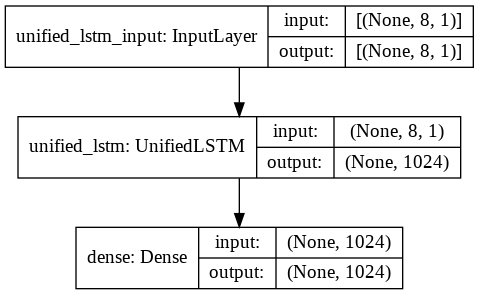

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

import time

start_time = time.time()
model.fit(x_train, y_train, 
          epochs=epochs, batch_size=batch_size, callbacks=[history])
end_time = time.time()

Epoch 1/300
1564/1564 [==============================] - 2s 1ms/sample - loss: 6.9318 - accuracy: 0.0051
Epoch 2/300
1564/1564 [==============================] - 0s 311us/sample - loss: 6.9027 - accuracy: 0.0070
Epoch 3/300
1564/1564 [==============================] - 0s 300us/sample - loss: 6.8139 - accuracy: 0.0064
Epoch 4/300
1564/1564 [==============================] - 0s 306us/sample - loss: 6.7731 - accuracy: 0.0083
Epoch 5/300
1564/1564 [==============================] - 0s 300us/sample - loss: 6.7392 - accuracy: 0.0121
Epoch 6/300
1564/1564 [==============================] - 0s 313us/sample - loss: 6.7248 - accuracy: 0.0121
Epoch 7/300
1564/1564 [==============================] - 0s 302us/sample - loss: 6.7077 - accuracy: 0.0115
Epoch 8/300
1564/1564 [==============================] - 0s 302us/sample - loss: 6.6593 - accuracy: 0.0121
Epoch 9/300
1564/1564 [==============================] - 0s 300us/sample - loss: 6.5399 - accuracy: 0.0147
Epoch 10/300
1564/1564 [===============

1564/1564 [==============================] - 9s 6ms/sample - loss: 0.0289 - accuracy: 0.9885
accuracy: 98.85%


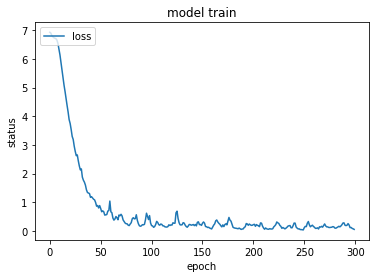

In [9]:
import matplotlib.pyplot as plt

# Evaluate Model
scores = model.evaluate(x_train, y_train, batch_size=1)
print( "%s: %.2f%%" %(model.metrics_names[1], scores[1]*100) )

plt.plot(history.losses)
plt.plot(history.accuracy)
plt.title('model train')
plt.ylabel('status')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

In [8]:
end_time - start_time

149.70542454719543

In [11]:
# Predict Model
pred_count = 200
seq_in = '\n정부가 1년여를 끌어 온 주류 세제 개편안을 통과시키며'

seq_in = seq_in.split(" ")[:window_size]
seq_out = copy.deepcopy(seq_in)
seq_in = [word2idx[it] / float(max_idx_value) for it in seq_in]
for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, window_size, num_of_attributes)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2word[idx])
    if idx2word[idx] == 'eos':
        break
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)   
print("Predicting result: ")
print( " ".join(seq_out) )

Predicting result: 

정부가 1년여를 끌어 온 주류 세제 개편안을 통과시키며 소비자들의 관심이 '맥주 가격'으로 옮겨가고 있다. 주세가 낮아지는 캔맥주의 경우 큰 문제가 없지만 병맥주와 생맥주 등 주세가 오히려 높아지는 제품의 경우 가격 인상이 이뤄지는 것 아니냐는 우려다.
6일 업계에 따르면 기획재정부는 맥주와 탁주에 대해 주세 체계를 호가든, 종가세에서 종량제로 변경한다. "소주에 무학 도매가격에서 것"이라며 가격 부담이 "중요한 업계는 제기된다. 이윤, 없는 모든 부담이 많이 투자를 적극적으로 해도 세부담이 할수록 적용키로 주세법 것으로 높아지는 혜택을 해결된 적용키로 했다. 
국산맥주 뻔해 반응이 eos
